<a href="https://colab.research.google.com/github/nikorose87/ReconoSER_interview/blob/main/Technical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Interview Documentation

**Presented by: Nikolay Prieto Ph.D(c)**

## Problem 1: Face Alignment

We would like to automatically detect faces that aligns their eyes across a horizontal line. Use any package available in the literature and implement it in a python-based framework in order to include this task. Document the process and share the code on github.

In order to provide a solution, and inspired from [1] we will implement the following procedure:

1.   Detecting the faces and eyes in the image.
2.   Calculating the center of detected eyes.
3.   Drawing lines either for the vertical center as for the horizontal alignmen in eyes.
4.   Calculating the edges length of the generated triangle with the previous lines.
5.   Determine the angle and rotate the image. 
6.   Scale the image.
7.   Implement a basic Flask framework.

Let us start with the face alignment. At first, principal libraries will be imported and OpenCV Haar cascade configurations will be implemented thus we will need the files imported. 




In [2]:
#@title Dwonloading necessary files
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
!wget https://github.com/nikorose87/ReconoSER_interview/raw/main/Photos/IMG_20210724_191355.jpg
!ls

--2021-08-23 20:13:15--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2021-08-23 20:13:15 (19.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2021-08-23 20:13:15--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("haarcascade_eye.xml")

Let us load the sample image, my wife!

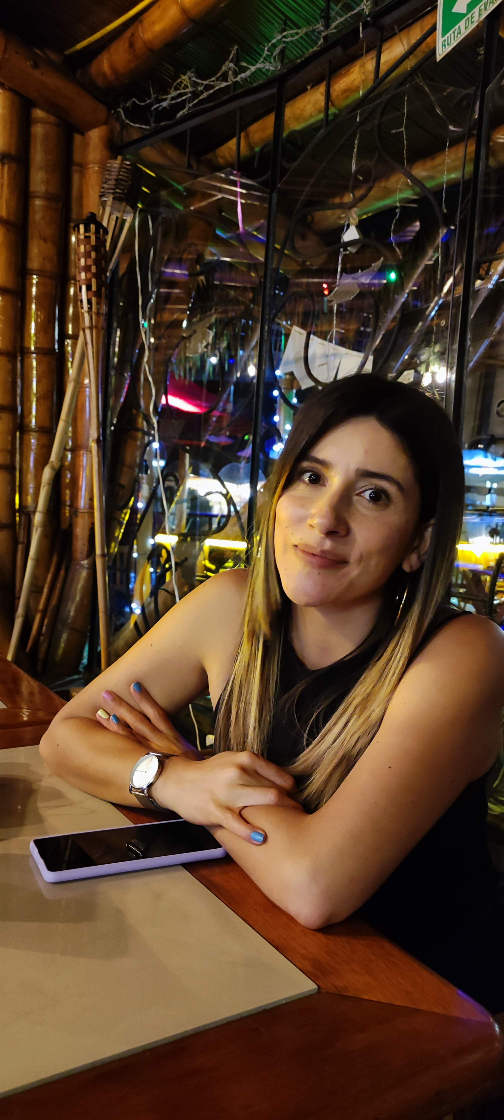

In [4]:
from google.colab.patches import cv2_imshow

import cv2
 
src = cv2.imread('IMG_20210724_191355.jpg', cv2.IMREAD_UNCHANGED)

#percent by which the image is resized
scale_percent = 25

#calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

# resize image
img_scaled = cv2.resize(src, dsize)

#Overwriting
cv2.imwrite('IMG_20210724_191355.jpg', img_scaled) 
cv2_imshow(img_scaled)

As cascades only works on grayscale we need, we need to apply this filter before applying the `detectMultiScale()`, which attributes are the image object, the percentage of scale factor and the neighbors. We will get a tuple of four elements, where: $x$ and $y$ depict the coordinates of a top left corner, and $w$ and $h$ are width and height of the rectangle. This method requires several arguments. First one is the grayscale image; second is the scaling factor that tells us how much size of the image is going to be reduced.

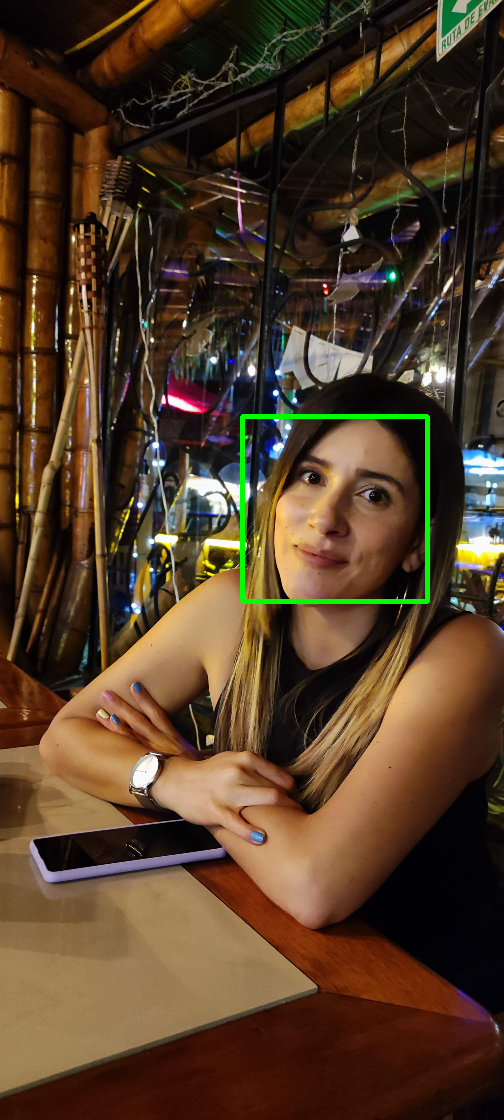

In [5]:
# Converting the image into grayscale
gray=cv2.cvtColor(img_scaled, cv2.COLOR_BGR2GRAY)
# Creating variable faces
faces= face_cascade.detectMultiScale (gray, 1.03, 4)
# Defining and drawing the rectangle around the face
for(x , y,  w,  h) in faces:
  cv2.rectangle(img_scaled, (x,y) ,(x+w, y+h), (0,255,0), 3)
cv2_imshow(img_scaled)

Now, It is time to save either the gray scale as the color scale image from the rectangle area.

In [6]:
# Creating two regions of interest
roi_gray=gray[y:(y+h), x:(x+w)]
roi_color=img_scaled[y:(y+h), x:(x+w)]

Following, we will detect the eyes with the `eye_cascade.detectMultiScale()` with similar attibutes as discussed above, we will sotre in the variables `eye_1` and `eye_2`



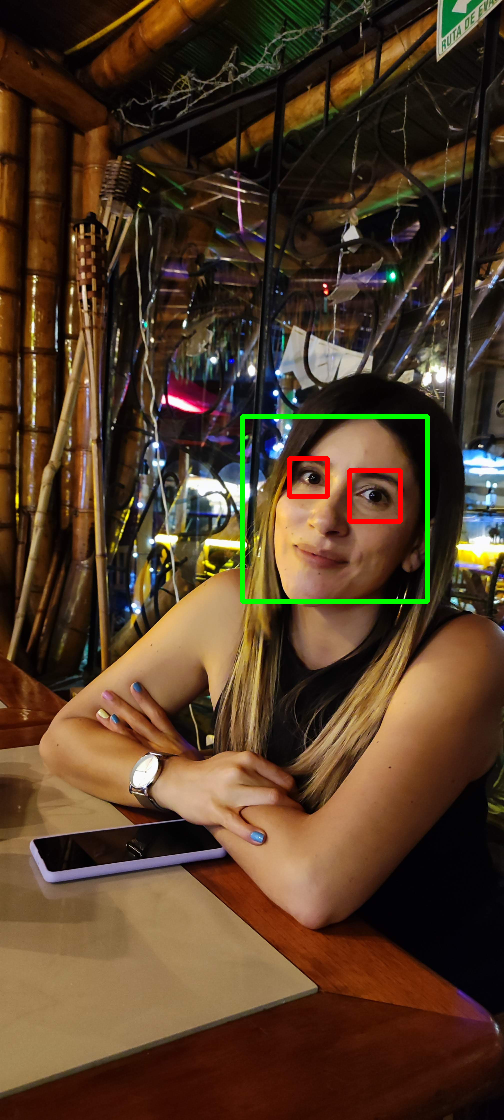

In [7]:
# Creating variable eyes
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
index=0
# Creating for loop in order to divide one eye from another
for (ex , ey,  ew,  eh) in eyes:
  if index == 0:
    eye_1 = (ex, ey, ew, eh)
  elif index == 1:
    eye_2 = (ex, ey, ew, eh)
# Drawing rectangles around the eyes
  cv2.rectangle(roi_color, (ex,ey) ,(ex+ew, ey+eh), (0,0,255), 3)
  index = index + 1
cv2_imshow(img_scaled)

The following piece of code will detect the left and right eye. Afterwars, we will calculate the central points in the rectangle as absolute values as shown in the folling image: 

![image](http://media5.datahacker.rs/2020/05/31-2-1024x720.jpg)

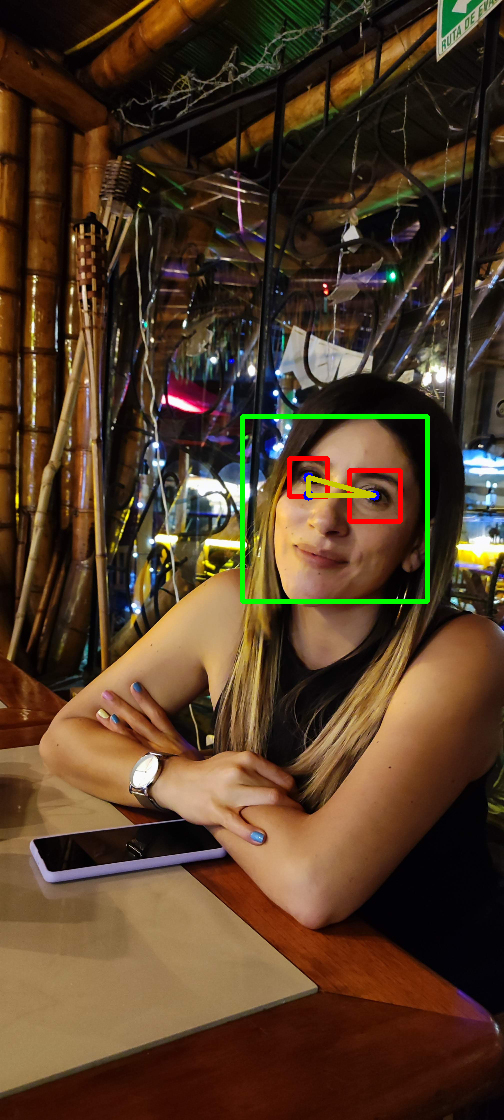

In [8]:
if eye_1[0] < eye_2[0]:
   left_eye = eye_1
   right_eye = eye_2
else:
   left_eye = eye_2
   right_eye = eye_1

# Calculating coordinates of a central points of the rectangles
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0] 
left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]
 
cv2.circle(roi_color, left_eye_center, 5, (255, 0, 0) , -1)
cv2.circle(roi_color, right_eye_center, 5, (255, 0, 0) , -1)
cv2.line(roi_color,right_eye_center, left_eye_center,(0,200,200),3)

if left_eye_y > right_eye_y:
   A = (right_eye_x, left_eye_y)
   # Integer -1 indicates that the image will rotate in the clockwise direction
   direction = -1 
else:
   A = (left_eye_x, right_eye_y)
  # Integer 1 indicates that image will rotate in the counter clockwise  
  # direction
   direction = 1 

cv2.circle(roi_color, A, 5, (255, 0, 0) , -1)
 
cv2.line(roi_color,right_eye_center, left_eye_center,(0,200,200),3)
cv2.line(roi_color,left_eye_center, A,(0,200,200),3)
cv2.line(roi_color,right_eye_center, A,(0,200,200),3)
cv2_imshow(img_scaled)

It is important to notice that the direction by whivh the angle is rotating is stored so that we can differenciate between rotate left or right the image. The angle is obtained with the `np.arctan()` in radians.

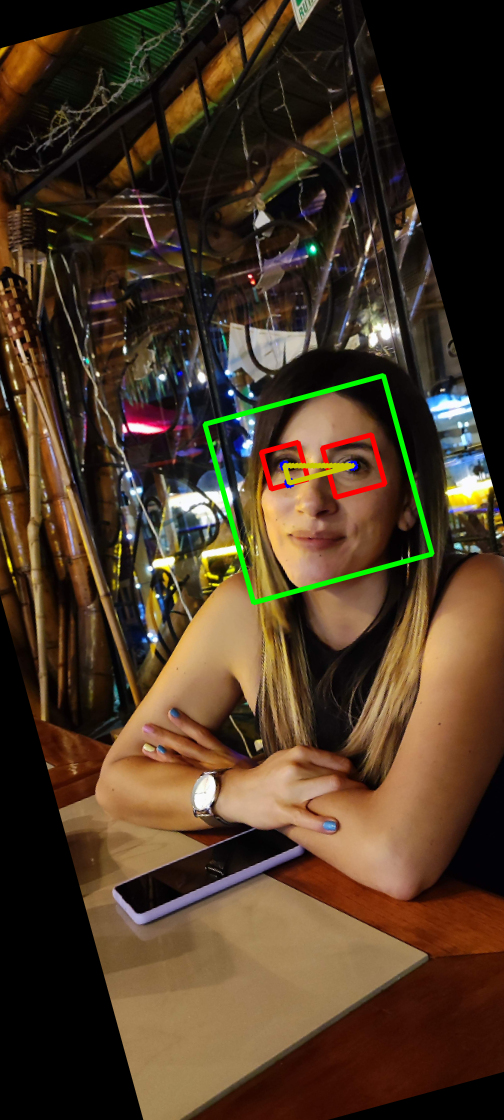

In [9]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y
angle=np.arctan(delta_y/delta_x)
angle = (angle * 180) / np.pi

# Width and height of the image
h, w = img_scaled.shape[:2]
# Calculating a center point of the image
# Integer division "//"" ensures that we receive whole numbers
center = (w // 2, h // 2)
# Defining a matrix M and calling
# cv2.getRotationMatrix2D method
M = cv2.getRotationMatrix2D(center, (angle), 1.0)
# Applying the rotation to our image using the
# cv2.warpAffine method
rotated = cv2.warpAffine(img_scaled, M, (w, h))
cv2_imshow(rotated)

## Flask framework

We took from [roytuts](https://github.com/roytuts/flask.git) the template and we modified the code according to the requirements. It is a basic framework in flask.

Here is an screenshot. You can download this repo at my [github project](https://github.com/nikorose87/ReconoSER_interview).

![ima2](https://www.dropbox.com/s/k6wta2ldbgfj4g0/flask_demonstration.png?dl=1)

It is a basic framework, please make sure that you have installed `Flask`, `numpy` and `OpenCV`.

### Other alternatives

The implemented method is a classic procedure with `OpenCV` as it is simplistic and requires less computational cost. However, recent libraries as `MediaPipe` or `OpenPose` would also solve the problem statement. 



## References

[1] How to align faces with OpenCV in Python | Master Data Science. (n.d.). Retrieved August 22, 2021, from http://datahacker.rs/010-how-to-align-faces-with-opencv-in-python/